<a href="https://colab.research.google.com/github/RosasGabriel/UFPB_ai_exam02/blob/main/AI_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

dog_db = pd.read_csv('dog_database.csv')

# Prints para checagem de leitura do arquivo
# print(dog_db)
# print(dog_db.head())
# print(dog_db.shape)

ignored_columns = ['description', 'temperament', 'grooming_frequency_category', 'shedding_category', 'energy_level_category', 'trainability_category', 'demeanor_category']

dog_db = dog_db.drop(ignored_columns, axis=1) 
# print(dog_db)
print(dog_db.head())
print(dog_db.shape)

         Unnamed: 0 popularity  min_height  max_height  min_weight  \
0     Affenpinscher        148       22.86       29.21    3.175147   
1      Afghan Hound        113       63.50       68.58   22.679619   
2  Airedale Terrier         60       58.42       58.42   22.679619   
3             Akita         47       60.96       71.12   31.751466   
4  Alaskan Malamute         58       58.42       63.50   34.019428   

   max_weight  min_expectancy  max_expectancy          group  \
0    4.535924            12.0            15.0      Toy Group   
1   27.215542            12.0            15.0    Hound Group   
2   31.751466            11.0            14.0  Terrier Group   
3   58.967008            10.0            13.0  Working Group   
4   38.555351            10.0            14.0  Working Group   

   grooming_frequency_value  shedding_value  energy_level_value  \
0                       0.6             0.6                 0.6   
1                       0.8             0.2                 

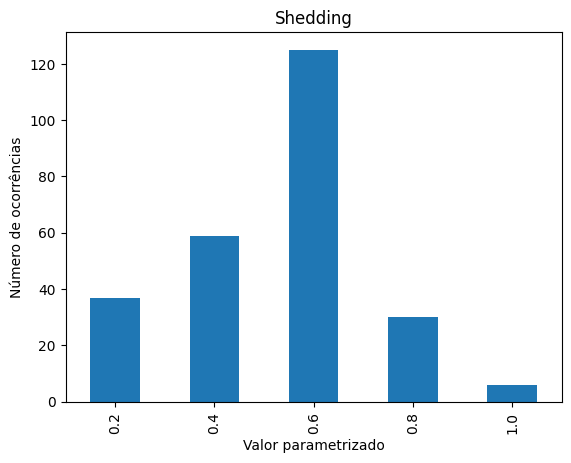

In [7]:
# Teste de organização de plotagem

shedding = dog_db['shedding_value']
count_shedding = shedding.value_counts().sort_index()

count_shedding.plot.bar(x=count_shedding.index)
plt.title("Shedding")
plt.xlabel("Valor parametrizado")
plt.ylabel("Número de ocorrências")
plt.show()

In [8]:
#Definição do atributo de saída

output = 'raça'

dog_db = dog_db.rename(columns={dog_db.columns[0]: output})
dog_db = dog_db.drop(output, axis=1)
# print(dog_db.columns)

In [9]:
#Retirada de atributos incompletos e codificação inteira

dog_db.dropna(inplace=True)
# print("----------------------------------------------------------------")
# print(dog_db)

int_encoder = LabelEncoder()
dog_db['group_value'] = int_encoder.fit_transform(dog_db['group'])

#Prints de testes para codificação da coluna 'groups'
# print(dog_db.head())
groups_val = int_encoder.classes_
print(groups_val)
uni_val = dog_db['group_value'].unique()
print(uni_val)

#Print para descobrir o valor atribuído a cada classe da coluna 'groups'
# for uni_val, groups_val in zip(dog_db['group_value'], dog_db['group']):
#   print(f'uni_val: {uni_val}, groups_val: {groups_val}')

print('Herding Group = 0\nHound Group = 1\nNon-Sporting Group = 2\nSporting Group = 3\nTerrier Group = 4\nToy Group = 5\nWorking Group = 6')

group_col = 'group'
dog_db = dog_db.drop(group_col, axis=1)
# print(dog_db.head())

['Herding Group' 'Hound Group' 'Non-Sporting Group' 'Sporting Group'
 'Terrier Group' 'Toy Group' 'Working Group']
[5 1 4 6 2 3 0]
Herding Group = 0
Hound Group = 1
Non-Sporting Group = 2
Sporting Group = 3
Terrier Group = 4
Toy Group = 5
Working Group = 6


In [13]:
#Normalização dos atributos

# dog_db['min_weight'] = dog_db['min_weight'].round(2)
# dog_db['max_weight'] = dog_db['max_weight'].round(2)
# print(dog_db.head())

# print(dog_db)

#Teste para descobrir qual coluna possuíam dados tipo 'string' qua não podiam ser tranformadas em float automaticamente pela função normalização
# for col_test in col_normalize:
#   if dog_db[col_test].dtype == object:
#     print(f"Coluna {col_test} contém string")

col_normalize = ['min_height', 'max_height', 'min_weight', 'max_weight', 'min_expectancy', 'max_expectancy', 'group_value']
scaler = MinMaxScaler()
dog_db[col_normalize] = scaler.fit_transform(dog_db[col_normalize])

print(dog_db.head())

  popularity  min_height  max_height  min_weight  max_weight  min_expectancy  \
0        148        0.16        0.18    0.046737    0.043516        0.800000   
1        113        0.80        0.80    0.333333    0.260903        0.800000   
2         60        0.72        0.64    0.333333    0.304323        0.733333   
3         47        0.76        0.84    0.466637    0.565226        0.666667   
4         58        0.72        0.72    0.500000    0.369596        0.666667   

   max_expectancy  grooming_frequency_value  shedding_value  \
0        0.789474                       0.6             0.6   
1        0.789474                       0.8             0.2   
2        0.736842                       0.6             0.4   
3        0.684211                       0.8             0.6   
4        0.736842                       0.6             0.6   

   energy_level_value  trainability_value  demeanor_value  group_value  
0                 0.6                 0.8             1.0     0.833